# pandas 2

Pandas 튜토리얼에 있는 Lessons for new pandas users_02에 대한 내용이다.

In [5]:
# 수업에 사용될 라이브러리를 임포트하기
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [6]:
# 아래의 코드는 쥬피터 노트북에서 그래프를 직접 나타내기 위해 사용하는 코드
%matplotlib inline

## 1. 데이터 만들기

데이터는 1000개의 아이 이름과 1880년에 기록된 출생수로 구성되어 있다. 데이터셋은 많은 중복을 통해 같은 이름이 한 번 이상 등장할 수 있다. 예를 들어, 이름 Bob 은 데이터셋에서 여러 번 등장할 수 있는데, 이는 서로 다른 병원에서 Bob이라는 이름으로 태어난 아이의 수를 보고 했기 때문이라 생각하자. 우선 아이 이름의 랜덤 집합을 생성해 보자. 

In [7]:
names = ['Bob','Jessica','Mary','John','Mel']

위의 5개의 이름을 이용하여 1000개의 랜덤한 아이 이름 리스트(list)를 만들어 보자.
* 0과 4 사이의 랜덤수를 생성

이를 위해서 `seed`, `randint`, `len`, `range`, `zip` 함수를 이용한다.

`seed(500)` - seed를 500.

`randint(low = 0, high= len(names))` - 0과 `len(names)`(names라는 리스트의 길이) 사이에 있는 랜덤한 정수를 생성.

`names[n]` - index가 n인 name을 선택.

`random_names` - 1000번 반복하여, name 리스트으로부터 랜덤한 이름을 선택함.

In [8]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# 앞의 10개 확인
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

0부터 1000 사이의 랜덤수 생성

In [9]:
# 1880년에 이름 당 태어난 출생수
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

`names`와 `births` 자료를 `zip` 함수를 이용하여 합함.

In [10]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

기본적인 데이터셋을 만들었다. 이제 `pandas` 라이브러리를 이용해 데이터프레임으로 만들고, 이를 txt 파일로 저장해보자.

In [11]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

Names  Births
0     Mary     968
1  Jessica     155
2  Jessica      77
3      Bob     578
4  Jessica     973
5  Jessica     124
6  Jessica     155
7     Mary     403
8     Mary     199
9     Mary     191

데이터프레임을 `births1880.txt`라는 이름의 txt 파일로 저장해보자. 이때, `to_csv`함수를 이용하여 저장한다. 매개변수 `index`와 `header`는 False로 두자. 

In [14]:
df.to_csv('births1880.txt',index=False,header=False)

## 2. 데이터 가져오기

데이터를 가져오기 위해, pandas의 함수 `read_csv`를 이용한다. `read_csv` 함수를 살펴보자.

In [ ]:
pd.read_csv?

In [15]:
Location = 'births1880.txt'
df = pd.read_csv(Location)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info는 다음과 같은 사실을 말해준다.
* 데이터셋에는 999개의 레코드가 있다.
* `Mary`라는 이름을 가진 열에는 999개의 값이 있다.
* `968`라는 이름을 가진 열에는 999개의 값이 있다.
* 두 개의 열이 있는데, 하나는 numeric이고, 다른 하나는 non numeric이다.

데이터프레임의 내용을 보기 위해서는 `head()` 함수를 이용하면 된다. 이는 앞부터 5개의 레코드를 보여준다. n개의 자료가 보고 싶다면, 괄호안에 n을 쓰면 된다.

In [17]:
df.head()

Mary  968
0  Jessica  155
1  Jessica   77
2      Bob  578
3  Jessica  973
4  Jessica  124

위를 살펴보면, read_csv 함수는 csv 파일의 첫 번째 레코드(record)를 header 이름으로 
두었다. 이는 csv 파일이 header 이름을 제공하지 않았기 때문이다. 
이를 해결하기 위해 read_csv 함수의 매개변수 header를 None으로 설정해보자. 
파이썬에서 None은 null을 의미한다. 

In [19]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info는 다음과 같은 사실을 말해준다.
* 데이터셋에는 1000개의 레코드가 있다.
* `0`라는 이름을 가진 열에는 1000개의 값이 있다.
* `1`라는 이름을 가진 열에는 1000개의 값이 있다.
* 두 개의 열이 있는데, 하나는 numeric이고, 다른 하나는 non numeric이다.

데이터프레임의 뒤에서 5개의 자료를 확인해 보자. 이는 `tail()` 함수를 이용한다.

In [21]:
df.tail()

0    1
995     John  151
996  Jessica  511
997     John  756
998  Jessica  294
999     John  152

만약 열에 특정한 이름을 사용하고 싶다면, names라는 매개변수를 사용한다. 이때, header라는 매개변수는 생략가능하다.

In [23]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

Names  Births
0     Mary     968
1  Jessica     155
2  Jessica      77
3      Bob     578
4  Jessica     973

숫자 [0, 1, 2, 3, 4] 는 엑셀 파일에 있는 행의 숫자라고 생각하면 된다. pandas에서는 이것을 데이터프레임(dataframe)의 index라고 한다. [Names, Births]는 엑셀 스프레드시트의 column header라고 생각하면 된다.

이제 사용한 txt 파일을 삭제해 보자.

In [24]:
import os
os.remove(Location)

# 2. 데이터 준비하기

데이터는 1880년에 태어난 아이의 이름과 출생수로 구성되어 있다. 여기에는 1000개의 레코드(record)가 있고, 결측치는 없다. "Names" 열은 오직 5개의 이름이 있다. "Names"열의 유일한 레코드를 확인하기 위해서 `unique()`를 이용한다.

In [25]:
# 방법 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [26]:
# 만약 유일한 값을 print하고 싶다면 아래와 같이 작성하면 된다:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [27]:
# 방법 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


데이터셋은 아이 이름당 여러 개의 출생수를 가지고 있으므로, 데이터를 합하여 유일한 아이 이름당 출생수를 나타내도록 할 수 있다. 이는 1000개의 행이 5개가 된다는 것을 의미한다. 이는 `groupby()`함수를 이용하여 만들 수 있다.

In [28]:
# Names열에 대하여 그룹화하기
name = df.groupby('Names')

# 각 그룹에 sum() 함수 적용하기
df = name.sum()
df

Births
Names          
Bob      106817
Jessica   97826
John      90705
Mary      99438
Mel      102319

## 3. 데이터 분석하기

가장 인기있는 이름 즉, 출생수가 가장 높은 이름을 찾기 위해서 다음과 같은 코드를 작성해 볼 수 있다.
* 데이터프레임을 정렬하고, 맨 위의 행을 선택
* 최댓값을 찾기 위해 max()을 이용


In [29]:
# 방법 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

Births
Names        
Bob    106817

In [30]:
# 방법 2:
df['Births'].max()

106817

## 4. 데이터 표현하기

`Births`열을 막대그래프로 나타내 보자. 표와 그래프를 보면, 데이터셋에서 Bob이 가장 인기 있는 이름이라는 사실을 알 수 있다.

The most popular name


Births
Names          
Bob      106817
Mel      102319
Mary      99438
Jessica   97826
John      90705

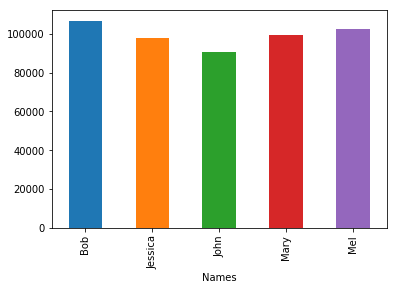

In [31]:
# 막대 그래프 만들기
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)